In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import mplcairo
mpl.use("module://mplcairo.base")
import matplotlib.pyplot as plt

mplcairo.set_options(float_surface=True)

from mplcairo import antialias_t
dict.__setitem__(plt.rcParams,"lines.antialiased",antialias_t.BEST)
dict.__setitem__(plt.rcParams,"patch.antialiased",antialias_t.BEST)
dict.__setitem__(plt.rcParams,"text.antialiased",antialias_t.GRAY)


In [2]:
# Setting the general theme
plt.rcParams["font.family"]="Arial"
plt.rcParams["mathtext.default"]="regular"
plt.rcParams["font.size"]=12
# Setting the general theme for the graph
plt.rcParams["axes.labelsize"]=10
plt.rcParams["legend.fontsize"]=10
plt.rcParams["xtick.labelsize"]=10
plt.rcParams["ytick.labelsize"]=10

In [3]:
# Assgining column names for ease of use
x_cols=["Day1_H2O2", "Day2_H2O2","Day3_H2O2",
       "Day1_Lysozyme", "Day2_Lysozyme","Day3_Lysozyme",
       "Day1_Sonication", "Day2_Sonication","Day3_Sonication",]

#Given column headers
x_cols_h=["Day 1 H2O2\n(µL)", "Day 2 H2O2\n(µL)","Day 3 H2O2\n(µL)",
       "Day 1 Lysozyme\n(mg mL –1)", "Day 2 Lysozyme\n(mg mL –1)","Day 3 Lysozyme\n(mg mL –1)",
       "Day 1 Sonication\n(minutes)", "Day 2 Sonication\n(minutes)","Day 3 Sonication\n(minutes)",
         ]
y_cols = ['Average_Conc', 'StDev_Conc', 'Average_Fold', 'StDev_Fold']


#Opening the excel file 
df= pd.read_excel(r"Bio_ML_summary-07-19-24.xlsx",
                 skiprows=4,
                 usecols="B:AD",
                 na_values=["na"])

#Renaming the column names
df=df.rename(columns={h: c for h, c in zip(x_cols_h,x_cols)})
df

# # Excluding a few rows
df = df[~df['Day3_Sonication'].isin(['Control', 'MRS','MRS2'])].reset_index(drop=True)

#Converting values to numeric
for col in df.columns:
    df[col]=pd.to_numeric(df[col],errors="coerce")
    
# Converting na 
df.isna().sum().sum()


92

# Converting na 

In [4]:
df=df.fillna(0.0)
df.isna().sum().sum()

0

In [5]:
# Renaming the columns
for c in df.columns:
    for xc in x_cols:
        if str(c).startswith(xc.replace('_', ' ').replace('Day', 'Day ')):
            df.rename(columns={c: xc}, inplace=True)
            break

In [6]:
# Re-naming more columns
df.rename(columns={
    'Average Conc.\n(particlesmL –1)': 'Average_Conc',
    'St. Dev. Conc.\n(particlesmL –1)': 'StDev_Conc',
    'Particle\nFold Increase': 'Average_Fold',
    'St. Dev %': 'StDev_Fold',
}, inplace=True)

In [7]:
# St Dev Fold
df["StDev_Fold"]=df["StDev_Fold"]/100*df["Average_Fold"]

# Combining only X and Y columns 
df_data = df[x_cols+y_cols]

#Resetting the index
df_data = df_data.reset_index(drop=True)

#Evaluating mean of the duplicate data
df_data=df_data.groupby(by=x_cols, sort = True).mean().reset_index()

#Adding a Round number column
df_data["Round_Num"]=[n//5+1 for n in range(len(df_data))]

df_data

,Day1_H2O2,Day2_H2O2,Day3_H2O2,Day1_Lysozyme,Day2_Lysozyme,Day3_Lysozyme,Day1_Sonication,Day2_Sonication,Day3_Sonication,Average_Conc,StDev_Conc,Average_Fold,StDev_Fold,Round_Num
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,30.0,2.183333e+09,4.988877e+08,1.378947,0.315087,1
1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,20.0,0.0,1.750000e+09,1.000000e+08,1.105263,0.063158,1
2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.0,0.0,1.300000e+09,1.500000e+08,0.821053,0.094737,1
3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,60.0,0.0,3.292500e+09,7.221291e+08,2.412897,0.504349,1
4,0.0,0.0,0.0,0.0,0.00,0.0,30.0,0.0,0.0,1.900000e+09,5.000000e+07,1.200000,0.031579,1
5,0.0,0.0,0.0,0.0,0.00,1.5,0.0,0.0,0.0,2.273333e+10,2.054805e+09,20.058824,1.813063,2
6,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,2.006667e+10,1.247219e+09,17.705882,1.100487,2
7,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.0,2.106667e+10,9.428090e+08,18.588235,0.831890,2
8,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,60.0,1.233500e+10,2.197015e+09,12.212871,2.175262,2
9,0.0,0.0,0.0,0.0,1.50,0.0,0.0,60.0,0.0,1.361000e+10,1.581139e+09,13.475248,1.565484,2


In [8]:
round_nums= np.array(df_data.Round_Num.unique())
round_nums

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [9]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [10]:
def shuffle_round(df, c, random_state=None):
    ''' Shuffle the order of samples within each round while preserving the indices of the best samples. '''
    idx = np.arange(len(df))
    best_idx = np.where(df[c].cummax() == df[c])[0]
    
    rng = np.random.default_rng(random_state)
    
    for rd in df.Round_Num.unique():
        rd_idx = df[df.Round_Num == rd].index.values
        mask = np.array([i in best_idx for i in rd_idx])
        rnd_idx = rd_idx[~mask].copy()
        rng.shuffle(rnd_idx)
        idx[rd_idx[~mask]] = rnd_idx

    return df.iloc[idx]

In [11]:
# Calculating the average of each round and over laying it on the graph
data_avg ={}

col = 'Average_Conc'
shuffled_df = shuffle_round(df_data, col, random_state=0)

for rd in shuffled_df.Round_Num.unique():
    av=shuffled_df[shuffled_df["Round_Num"]==rd]["Average_Conc"].mean()
    data_avg[rd]=av
avg_arr  = np.array(list(data_avg.values()))

In [12]:
all_rounds= np.array(sorted(df_data.Round_Num.unique()))*5
all_rounds

array([ 5, 10, 15, 20, 25, 30, 35, 40], dtype=int64)

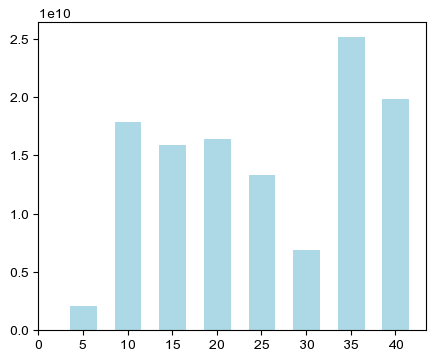

In [13]:
#Plotting
fig3, ax3 = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
ax3.bar(all_rounds, avg_arr, color="lightblue", edgecolor="None", width = 3)
ax3.set_xticks(np.arange(0,41,5))
ax3.set_yticks(np.arange(0,2.5e10+1,5e9))
fig3.savefig('plot.png')
display(fig3)